# Data Mining Project

## News Analysis

#### Editors:
Anastasios Bazinis - 1115201500099 <br>
Grigorios Katrakazas - 1115201600063



## Prepreparation

**1)** Import libraries and packages

In [1]:
from pandas import DataFrame, read_csv
import nltk
import folium
from folium import plugins
import re
from textblob import Word
import operator


from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,cross_validate,KFold,cross_val_predict

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import metrics
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.decomposition import PCA, TruncatedSVD, FastICA

import seaborn as sns

from sklearn.metrics import accuracy_score,roc_curve,auc,make_scorer,plot_roc_curve


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD, FastICA

import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize.stanford import StanfordTokenizer
from nltk.tokenize import RegexpTokenizer, word_tokenize,WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder,BigramAssocMeasures

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.preprocessing import LabelEncoder
import pickle

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import os,glob
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from sklearn.model_selection import train_test_split


# Enable inline plotting
%matplotlib inline


**2)** Read txt files and merge them in one dataframe and recognize them by category

In [2]:
  
data_folder = "fulltext/data/"
classes = ["business","entertainment","politics","sport","tech"]
x = []
y = []
t=[]
j = []

for i in classes:
    files = os.listdir( data_folder + i)
    #print(files)
    for text_file in files:
        file_path = data_folder + i + "/" + text_file
        with open(file_path,'r',errors='replace') as f:
            data = f.readlines()[1:]
        data = ' '.join(data)
        with open(file_path,'r',errors='replace') as f:
            title = f.readlines()[0:1]
        title = ' '.join(title)
        
        t.append(title)
        x.append(data)
        y.append(i)
        j.append(int(file_path.split('/')[-1][:-4]))
   
data = {'id ': j,'title': t,'content': x ,'category': y}       
df = pd.DataFrame(data)

df

id                                 title  \
0       1  Ad sales boost Time Warner profit\n   
1       2   Dollar gains on Greenspan speech\n   
2       3  Yukos unit buyer faces loan claim\n   
3       4  High fuel prices hit BA's profits\n   
4       5  Pernod takeover talk lifts Domecq\n   
...   ...                                  ...   
2220  397   BT program to beat dialler scams\n   
2221  398    Spam e-mails tempt net shoppers\n   
2222  399            Be careful how you code\n   
2223  400    US cyber security chief resigns\n   
2224  401   Losing yourself in online gaming\n   

                                                content  category  
0     \n Quarterly profits at US media giant TimeWar...  business  
1     \n The dollar has hit its highest level agains...  business  
2     \n The owners of embattled Russian oil giant Y...  business  
3     \n British Airways has blamed high fuel prices...  business  
4     \n Shares in UK drinks and food firm Allied Do...  business  
...                                                 ...       ...  
2220  \n BT is introducing two initiatives to help b...      tech  
2221  \n Computer users across the world continue to...      tech  
2222  \n A new European directive could put software...      tech  
2223  \n The man making sure US computer networks ar...      tech  
2224  \n Online role playing games are time-consumin...      tech  

[2225 rows x 4 columns]

**3)** Split the dataframe in train and test data

In [3]:
y = df['category']
X = df

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
#print(X_test.groupby('category').size())


X_test = X_test.drop(['category'],axis=1)

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


X_test.columns = X_test.columns.str.strip()
X_train.columns = X_train.columns.str.strip()

X_test=X_test.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)


**4)** make 2 tsv files (one for the train and one for the test data)

In [4]:
X_train.to_csv('train_set.tsv',sep = '\t',index = False)
X_test.to_csv('test_set.tsv',sep = '\t',index = False)

# Data analysis

### 5 WordClouds , one for each category

business



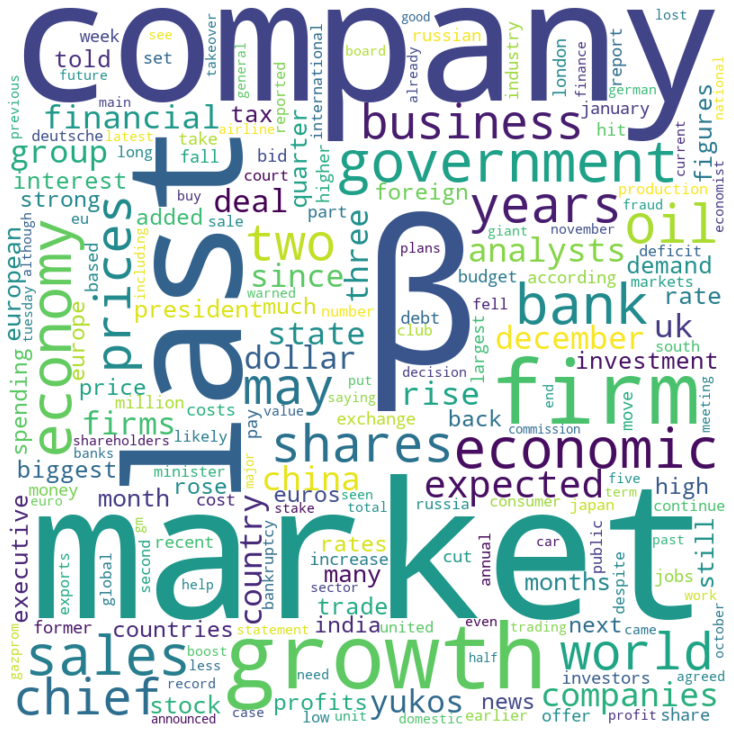

entertainment



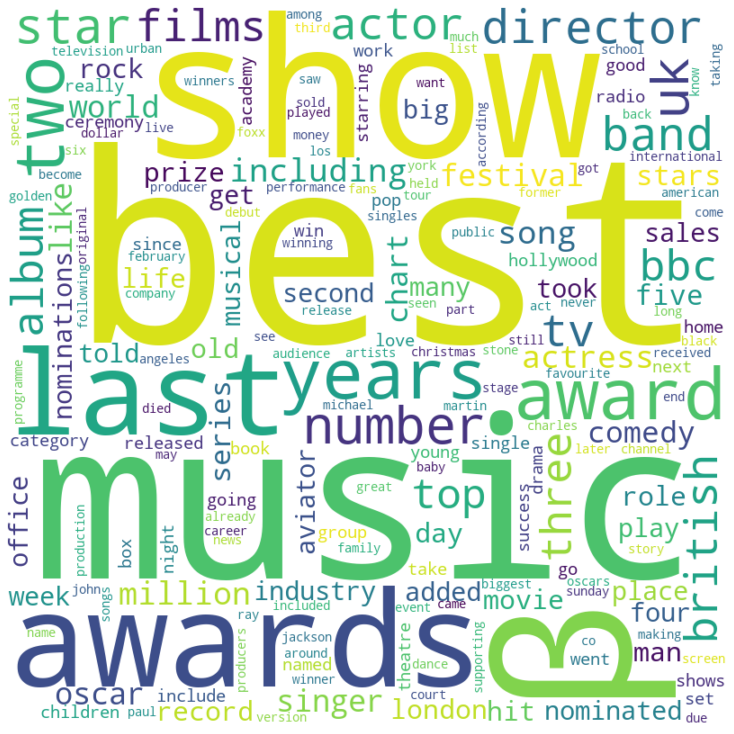

politics



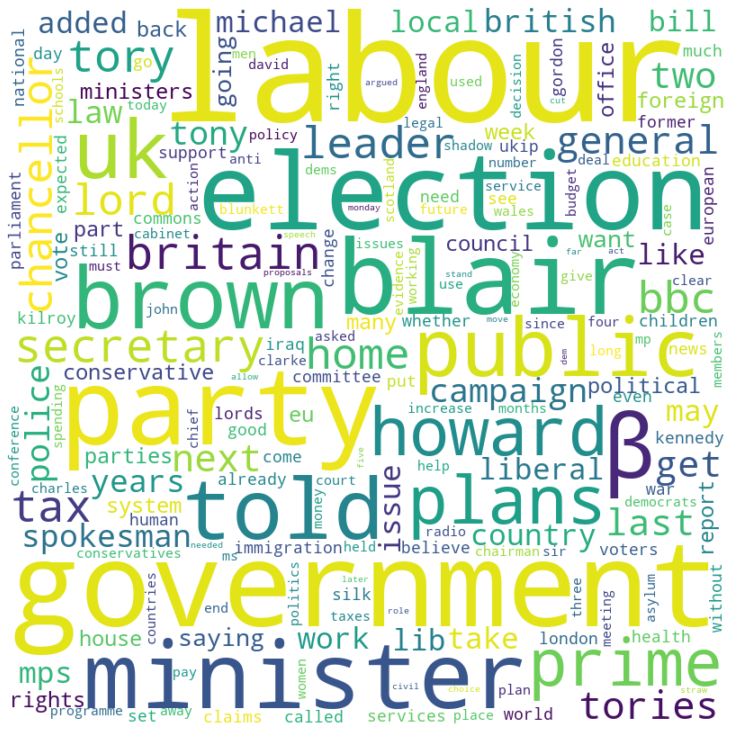

sport



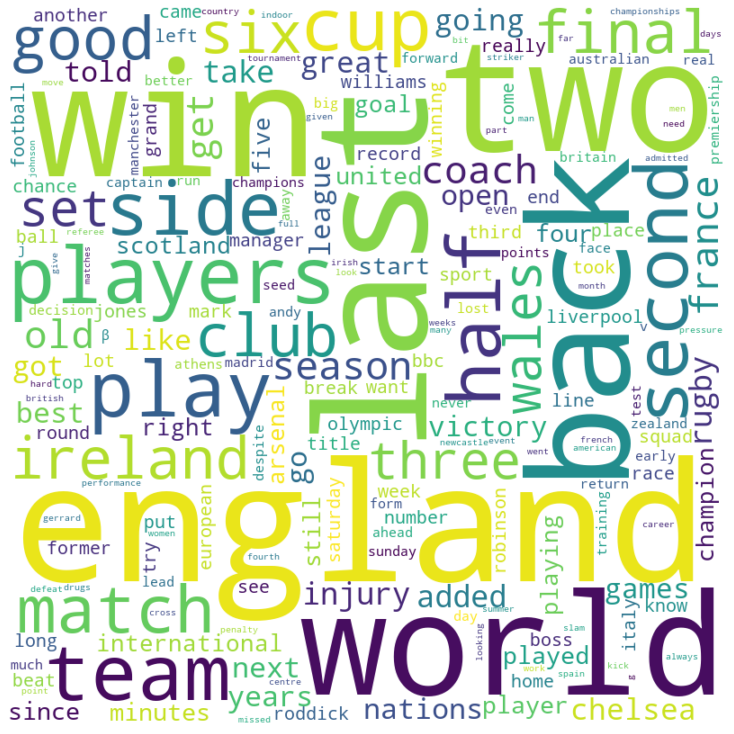

tech



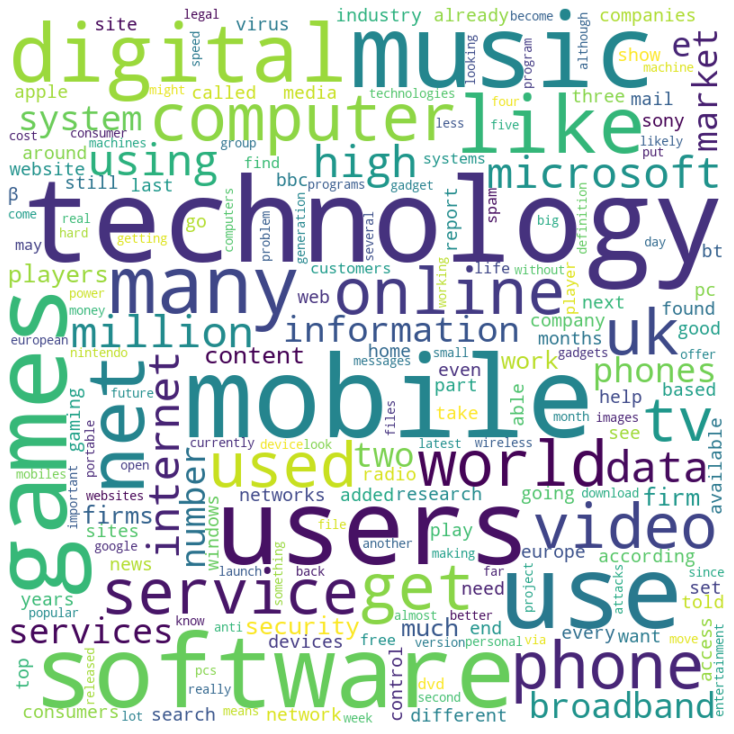

In [5]:
#Wordclouds


my_additional_stop_words={'said','also','will','new','say','one','now','time','people','us','says'
                          ,'film','make','year','game','first','this','the','in','new','that','is','are','think'
                         ,'way','made','mr','would','however','well','could'}

cat = ['business','entertainment','politics','sport','tech']

for c,i in zip(cat,range(0,5)):

    print('\033[1m'+cat[i]+'\033[0m')
    print()
    
    lowercase = []
    clean_words = []
    clean_words_str = []
    tokenizer = WordPunctTokenizer()
    for word in df['content'][df['category'] == c]:
        lowercase.append(tokenizer.tokenize(word.lower()))

    stop_words = set(stopwords.words('english'))

    i=0
    for x in range(0,len(lowercase)):

        clean_words.append([token for token in lowercase[x] if not token in stop_words and token not in my_additional_stop_words and token.isalpha()])
        clean_words_str.append(" ".join(clean_words[i]))
        i+=1

    total = Counter()
    for i in clean_words[0:]:
            total.update(i)


    dict(total)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate_from_frequencies(total)

    # plot the WordCloud image
    plt.figure(figsize = (15, 10), facecolor = None) 
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()



**<blockquote>Tokenize test data</blockquote>**

In [6]:

test_lowercase = []
clean_test_words = []
clean_test_words_str = []
tokenizer = WordPunctTokenizer()
for word in X_test['content']:
    test_lowercase.append(tokenizer.tokenize(word.lower()))

stop_words = set(stopwords.words('english'))

i=0
for x in range(0,len(test_lowercase)):
    
    clean_test_words.append([token for token in test_lowercase[x] if not token in stop_words and token.isalpha()])
    clean_test_words_str.append(" ".join(clean_test_words[i]))
    i+=1


**<blockquote>Tokenize train data</blockquote>**

In [7]:

lowercase = []
clean_words = []
clean_words_str = []
tokenizer = WordPunctTokenizer()
for word in X_train['content']:
    lowercase.append(tokenizer.tokenize(word.lower()))

stop_words = set(stopwords.words('english'))

i=0
for x in range(0,len(lowercase)):
    
    clean_words.append([token for token in lowercase[x] if not token in stop_words and token.isalpha()])
    clean_words_str.append(" ".join(clean_words[i]))
    i+=1


### 1) Bag Of Words

In [8]:
#BoW

bow_vectorizer = CountVectorizer(max_features=100,ngram_range=(1,2))
bow_xtrain = bow_vectorizer.fit_transform(clean_words_str)  

bow_xtest = bow_vectorizer.transform(clean_test_words_str)

### 2) TF-IDF

In [9]:
#tf-idf
tfidf_vectorizer = TfidfVectorizer(max_features=100, sublinear_tf=True, min_df=7) 
tfidf = tfidf_vectorizer.fit_transform(clean_words_str)

tfidf_test = tfidf_vectorizer.transform(clean_test_words_str)


#### K Nearest Neighbours  from scratch

source: <a>"https://aiaspirant.com/knn-from-scratch/"</a>



In [10]:
#KNN


def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNearestNeighbors(BaseEstimator, ClassifierMixin):
    
    def __init__(self, K=3):
        self.K = K

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    
    def cross_validation_split(dataset, n_folds):
        dataset_split = list()
        dataset_copy = list(dataset)
        fold_size = int(len(dataset) / n_folds)
        for _ in range(n_folds):
            fold = list()
            while len(fold) < fold_size:
                index = randrange(len(dataset_copy))
                fold.append(dataset_copy.pop(index))
            dataset_split.append(fold)
        return dataset_split


    def predict(self, X_test):

            # list to store all our predictions
            predictions = []

            # loop over all observations in the test set
            for i in range(len(X_test)):            

                # calculate the distance between the test point and all other points in the training set
                dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])

                # sort the distances and return the indices of K neighbors
                dist_sorted = dist.argsort()[:self.K]

                # get the neighbors
                neigh_count = {}

                # for each neighbor find the class
                for idx in dist_sorted:
                    if self.Y_train[idx] in neigh_count:
                        neigh_count[self.Y_train[idx]] += 1
                    else:
                        neigh_count[self.Y_train[idx]] = 1

                sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)

                # append the class label to the list
                predictions.append(sorted_neigh_count[0][0])
            return predictions
        
     
        

#### Function for a multiclass rocplot

In [11]:
def rocplot(y_test,Y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(Y_pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

    from itertools import cycle

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(5):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= 5

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw=2
    plt.figure(figsize=(11,7))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow','red'])
    for i, color in zip(range(5), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='grey', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Classification with BoW

<ol>
<li>SVM</li>
<li>Random Forests</li>
<li>Naive Bayes</li>
<li>KNN</li>
</ol>



### We use a 10 fold cross validation.<br><br>
**Scoring methods are:**
<ul>
<li>f1</li>
<li>recall</li>
<li>precision</li>
<li>accuracy</li>
</ul>
<br>
<b>We also find the auc_score (except for KNN) of the roc and we show the roc plot for each category

SVM

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       102
           1       0.91      0.42      0.57        77
           2       0.90      0.62      0.73        84
           3       0.47      0.95      0.63       102
           4       0.84      0.53      0.65        80

    accuracy                           0.64       445
   macro avg       0.75      0.63      0.64       445
weighted avg       0.74      0.64      0.64       445

Classification for Bow

10-fold cross validation:
	f1 =  0.6319638948041839
	recall =  0.6175913147534959
	precision =  0.7574474228716064
	Accuracy =  0.6348314606741573
	ROC auc score = 0.9363028878844762

Accuracy score for test file =  0.6426966292134831



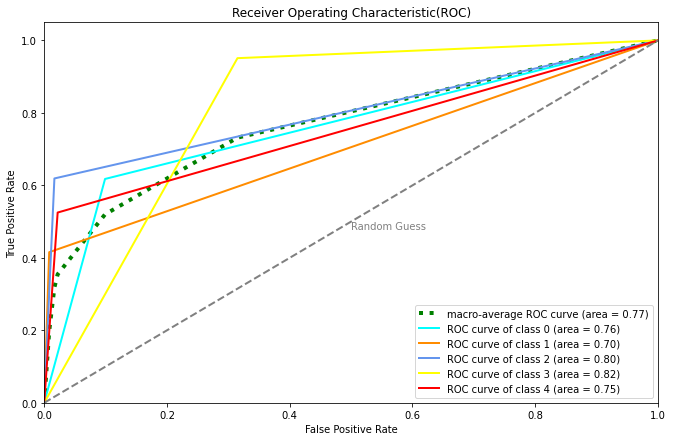


Random Forests

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       102
           1       0.98      0.52      0.68        77
           2       0.86      0.82      0.84        84
           3       0.65      0.98      0.78       102
           4       0.91      0.50      0.65        80

    accuracy                           0.75       445
   macro avg       0.81      0.73      0.73       445
weighted avg       0.80      0.75      0.74       445

Classification for Bow

10-fold cross validation:
	f1 =  0.7085849113900216
	recall =  0.700058446617328
	precision =  0.7793168700130052
	Accuracy =  0.7185393258426966
	ROC auc score = 0.946876738735341

Accuracy score for test file =  0.7460674157303371



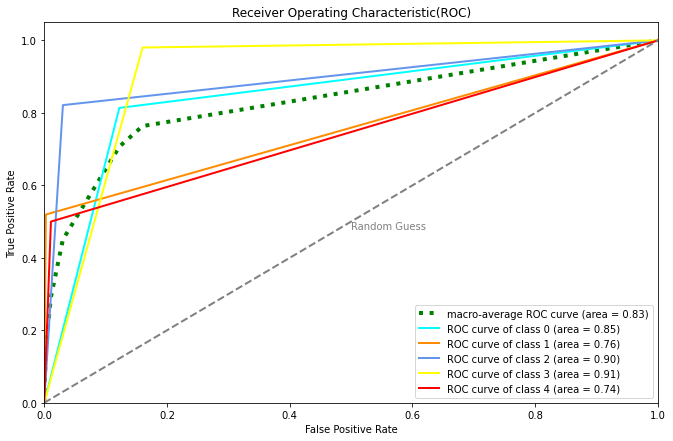


Naive Bayes

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       102
           1       0.93      0.86      0.89        77
           2       0.88      0.82      0.85        84
           3       0.81      0.98      0.88       102
           4       0.79      0.70      0.74        80

    accuracy                           0.83       445
   macro avg       0.84      0.82      0.83       445
weighted avg       0.83      0.83      0.83       445

Classification for Bow

10-fold cross validation:
	f1 =  0.8098568410830852
	recall =  0.8081200554393849
	precision =  0.8163931913951025
	Accuracy =  0.8117977528089888
	ROC auc score = 0.9473766136318418

Accuracy score for test file =  0.8292134831460675



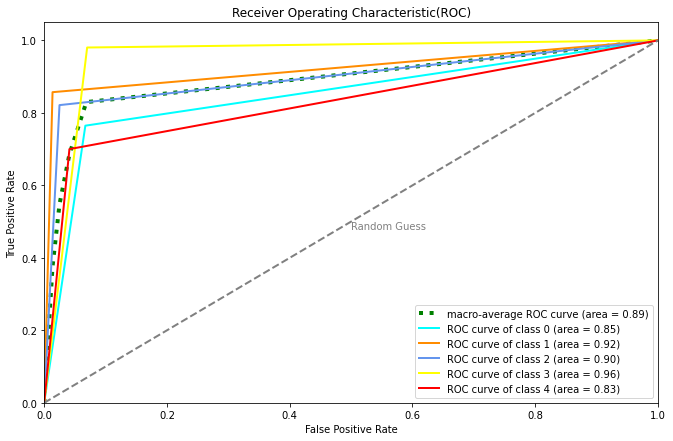


K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       102
           1       0.78      0.81      0.79        77
           2       0.90      0.71      0.79        84
           3       0.75      0.92      0.82       102
           4       0.82      0.50      0.62        80

    accuracy                           0.77       445
   macro avg       0.79      0.75      0.76       445
weighted avg       0.78      0.77      0.76       445

Classification for Bow

10-fold cross validation:
	f1 =  0.7138870881817242
	recall =  0.7057231636843279
	precision =  0.737363801372771
	Accuracy =  0.7168539325842695

Accuracy score for test file =  0.7662921348314606



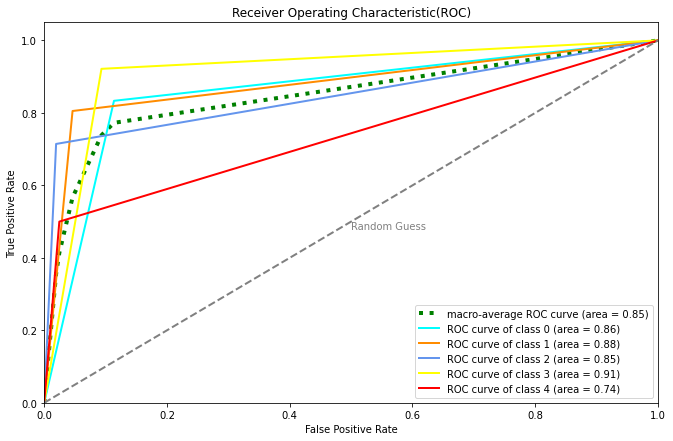

In [12]:
#Classification

# BoW
from itertools import cycle

clf_name = ['SVM','Random Forests','Naive Bayes', 'K Nearest Neighbors']
clf = [SVC(kernel='poly',probability = True),RandomForestClassifier(max_depth=2, random_state=0),GaussianNB(),KNearestNeighbors(K=5)]

X = bow_xtrain.toarray()
X_te = bow_xtest.toarray()

for c,i in zip(clf,range(0,4)):
    
    print('\033[1m'+clf_name[i]+'\033[0m')
    print()
    
    c.fit(X, y_train)
    Y_pred = c.predict(X_te) 

    confusion_matrix(y_test,Y_pred) 
    print(classification_report(y_test,Y_pred))


    f1 = cross_val_score(c, X,y_train,scoring="f1_weighted", cv=10)

    recall = cross_val_score(c, X,y_train,scoring="recall_macro", cv=10)

    precision = cross_val_score(c, X,y_train,scoring="precision_weighted", cv=10)

    acc = cross_val_score(c, X,y_train,scoring="accuracy", cv=10)
    
    if i<3:
        roc = cross_val_score(c, X,y_train,scoring="roc_auc_ovo", cv=10)


    print('\033[4m'+'Classification for Bow'+'\033[0m'+'\n')
    print('10-fold cross validation:')
    print('\t'+'f1 = ',f1.mean())
    print('\t'+'recall = ',recall.mean())
    print('\t'+'precision = ',precision.mean())
    print('\t'+'Accuracy = ',acc.mean())
    if i<3:
        print('\t'+'ROC auc score = {}'.format(roc.mean()))
    print()
    
    
    print('Accuracy score for test file = ',accuracy_score(y_test, Y_pred))
    print()
    
    rocplot(y_test,Y_pred)
    print()

## Classification with TF-IDF

<ol>
<li>SVM</li>
<li>Random Forests</li>
<li>Naive Bayes</li>
<li>KNN</li>
</ol>



### We use a 10 fold cross validation.<br><br>
**Scoring methods are:**
<ul>
<li>f1</li>
<li>recall</li>
<li>precision</li>
<li>accuracy</li>
</ul>
<br>
<b>We also find the auc_score of the roc and we show the roc plot for each category

SVM

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       102
           1       0.95      0.92      0.93        77
           2       0.96      0.87      0.91        84
           3       0.97      0.95      0.96       102
           4       0.91      0.89      0.90        80

    accuracy                           0.91       445
   macro avg       0.92      0.91      0.91       445
weighted avg       0.92      0.91      0.91       445

Classification for tfidf

	10-fold cross validation:
	f1 =  0.905569087376669
	recall =  0.9023105659150865
	precision =  0.9079900861090161
	Accuracy =  0.9056179775280899
	ROC auc score = 0.9895333184354353

Accuracy score for test file =  0.9123595505617977



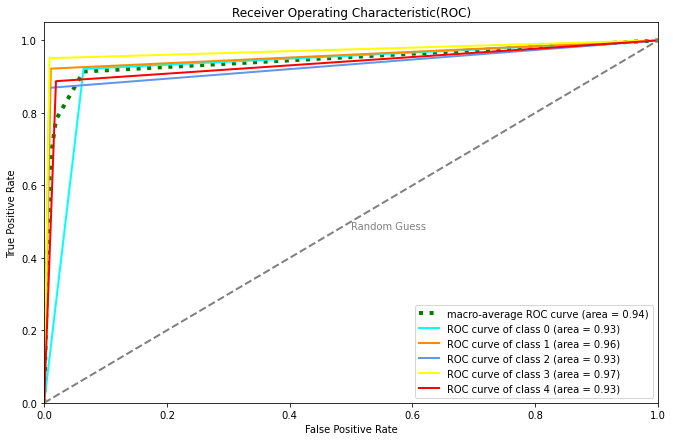


Random Forests

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       102
           1       0.95      0.51      0.66        77
           2       0.88      0.77      0.82        84
           3       0.64      0.98      0.77       102
           4       0.90      0.46      0.61        80

    accuracy                           0.73       445
   macro avg       0.80      0.71      0.72       445
weighted avg       0.78      0.73      0.72       445

Classification for tfidf

	10-fold cross validation:
	f1 =  0.6990867592725742
	recall =  0.690409197496322
	precision =  0.7718308254499474
	Accuracy =  0.7101123595505617
	ROC auc score = 0.9471609701245326

Accuracy score for test file =  0.7280898876404495



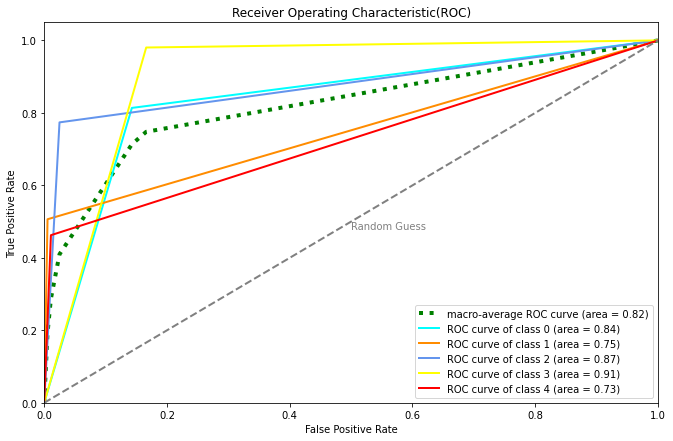


Naive Bayes

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       102
           1       0.93      0.84      0.88        77
           2       0.94      0.86      0.89        84
           3       0.84      0.98      0.90       102
           4       0.78      0.81      0.80        80

    accuracy                           0.86       445
   macro avg       0.87      0.86      0.86       445
weighted avg       0.87      0.86      0.86       445

Classification for tfidf

	10-fold cross validation:
	f1 =  0.8249983320345733
	recall =  0.8272099309146448
	precision =  0.8424019665621512
	Accuracy =  0.8275280898876405
	ROC auc score = 0.9587054623790452

Accuracy score for test file =  0.8629213483146068



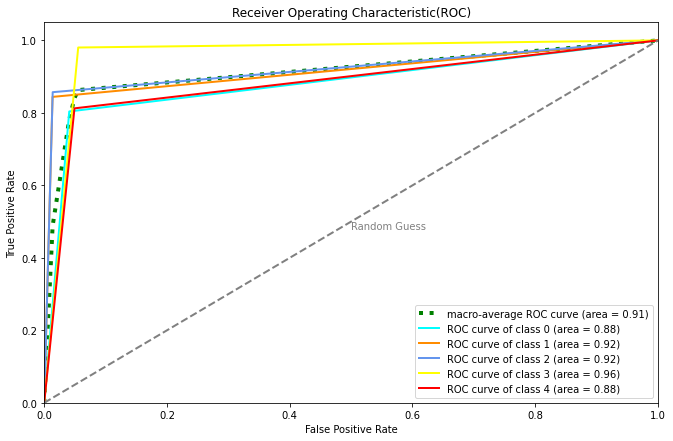


K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.97      0.94      0.95        77
           2       0.87      0.89      0.88        84
           3       0.96      0.91      0.93       102
           4       0.82      0.86      0.84        80

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445

Classification for tfidf

	10-fold cross validation:
	f1 =  0.8689515460078752
	recall =  0.8667387915111684
	precision =  0.8726046777384946
	Accuracy =  0.8691011235955056

Accuracy score for test file =  0.8876404494382022



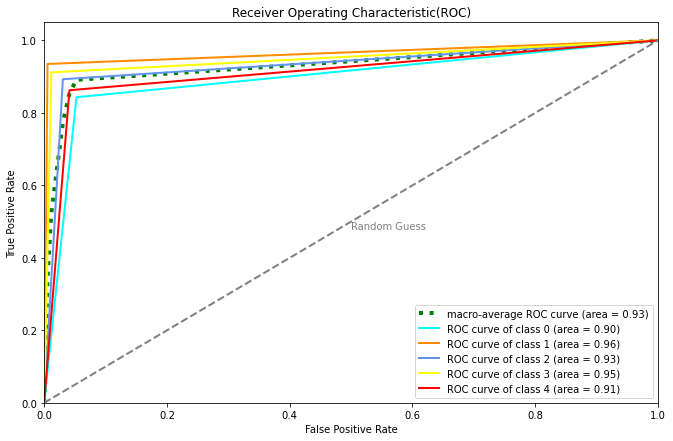

In [13]:
#Classification

# Tfidf

clf_name = ['SVM','Random Forests','Naive Bayes', 'K Nearest Neighbors']
clf = [SVC(kernel='poly',probability = True),RandomForestClassifier(max_depth=2, random_state=0),GaussianNB(),KNearestNeighbors(K=5)]

X = tfidf.toarray()
X_te = tfidf_test.toarray()

for c,i in zip(clf,range(0,4)):
    
    print('\033[1m'+clf_name[i]+'\033[0m')
    print()
    c.fit(X, y_train)
    Y_pred = c.predict(X_te) 

    confusion_matrix(y_test,Y_pred) 
    print(classification_report(y_test,Y_pred))


    f1 = cross_val_score(c, X,y_train,scoring="f1_weighted", cv=10)

    recall = cross_val_score(c, X,y_train,scoring="recall_macro", cv=10)

    precision = cross_val_score(c, X,y_train,scoring="precision_weighted", cv=10)
    
    acc = cross_val_score(c, X,y_train,scoring="accuracy", cv=10)
    if i<3:
        roc = cross_val_score(c, X,y_train,scoring="roc_auc_ovo", cv=10)
        
    print('\033[4m'+'Classification for tfidf'+'\033[0m'+'\n')
    print('\t'+'10-fold cross validation:')
    print('\t'+'f1 = ',f1.mean())
    print('\t'+'recall = ',recall.mean())
    print('\t'+'precision = ',precision.mean())
    print('\t'+'Accuracy = ',acc.mean())
    if i<3:
        print('\t'+'ROC auc score = {}'.format(roc.mean()))
    print()
    
    print('Accuracy score for test file = ',accuracy_score(y_test, Y_pred))
    print()
    
    rocplot(y_test,Y_pred)
    print()

## Beat the Benchmark (bonus)

#### Tokenize both the title and the content for train and test data files 
#### We implemented it for the Random Forest algorithm and we applied it on BoW
#### The score improved from 0.7460674157303371  to  0.7730337078651686

In [49]:
lowercase = []
clean_words = []
clean_words_str = []
tokenizer = WordPunctTokenizer()
for word in X_train['content']+X_train['title']:
    lowercase.append(tokenizer.tokenize(word.lower()))

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['said','also','will','new','say','one','now','time','people','us','says'
                          ,'film','make','year','game','first','this','the','in','new','that','is','are','think'
                         ,'way','made','mr','would','however','well','could']
stopwords.extend(newStopWords)


i=0
for x in range(0,len(lowercase)):
    clean_words.append([token for token in lowercase[x] if not token in stop_words and token.isalpha()])
    clean_words_str.append(" ".join(clean_words[i]))
    i+=1

In [50]:
test_lowercase = []
clean_test_words = []
clean_test_words_str = []
tokenizer = WordPunctTokenizer()
for word in X_test['content']+X_test['title']:
    test_lowercase.append(tokenizer.tokenize(word.lower()))


i=0
for x in range(0,len(test_lowercase)):
    clean_test_words.append([token for token in test_lowercase[x] if not token in stop_words and token.isalpha()])
    clean_test_words_str.append(" ".join(clean_test_words[i]))
    i+=1



In [51]:
#BoW

bow_vectorizer = CountVectorizer(max_features=100,ngram_range=(1,2))
bow_xtrain = bow_vectorizer.fit_transform(clean_words_str)  

bow_xtest = bow_vectorizer.transform(clean_test_words_str)

Random Forests

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       102
           1       0.95      0.51      0.66        77
           2       0.89      0.79      0.84        84
           3       0.66      1.00      0.79       102
           4       0.89      0.61      0.73        80

    accuracy                           0.77       445
   macro avg       0.83      0.75      0.76       445
weighted avg       0.81      0.77      0.77       445

Classification for Bow

10-fold cross validation:
	f1 =  0.7332133019053647
	recall =  0.7218137281198153
	precision =  0.7990531231122822
	Accuracy =  0.7398876404494381
	ROC auc score = 0.9565741376801693

Accuracy score for test file =  0.7730337078651686



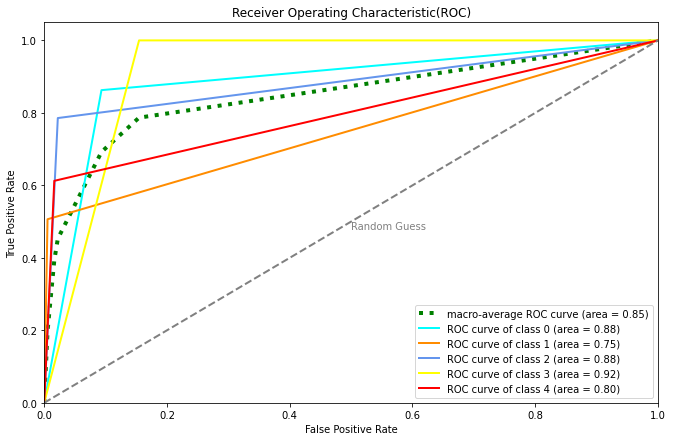

In [52]:
from itertools import cycle

clf_name = ['Random Forests']
clf = [RandomForestClassifier(max_depth=2, random_state=0)]


X = bow_xtrain.toarray()
X_te = bow_xtest.toarray()

for c,i in zip(clf,range(0,1)):
    
    print('\033[1m'+clf_name[i]+'\033[0m')
    print()
    
    c.fit(X, y_train)
    Y_pred = c.predict(X_te) 

    confusion_matrix(y_test,Y_pred) 
    print(classification_report(y_test,Y_pred))


    f1 = cross_val_score(c, X,y_train,scoring="f1_weighted", cv=10)

    recall = cross_val_score(c, X,y_train,scoring="recall_macro", cv=10)

    precision = cross_val_score(c, X,y_train,scoring="precision_weighted", cv=10)

    acc = cross_val_score(c, X,y_train,scoring="accuracy", cv=10)
        
    roc = cross_val_score(c, X,y_train,scoring="roc_auc_ovo", cv=10)


    print('\033[4m'+'Classification for Bow'+'\033[0m'+'\n')
    print('10-fold cross validation:')
    print('\t'+'f1 = ',f1.mean())
    print('\t'+'recall = ',recall.mean())
    print('\t'+'precision = ',precision.mean())
    print('\t'+'Accuracy = ',acc.mean())
    print('\t'+'ROC auc score = {}'.format(roc.mean()))
    print()
    
    
    print('Accuracy score for test file = ',accuracy_score(y_test, Y_pred))
    print()
    
    rocplot(y_test,Y_pred)
    print()

# Clustering TF-IDF
*BoW clustering was not implemented because of the lack of good results 

In [53]:
lowercase = []
clean_words = []
clean_words_str = []
tokenizer = WordPunctTokenizer()
for word in X_train['content']:
    lowercase.append(tokenizer.tokenize(word.lower()))



i=0
for x in range(0,len(lowercase)):
    clean_words.append([token for token in lowercase[x] if not token in stop_words and token.isalpha()])
    clean_words_str.append(" ".join(clean_words[i]))
    i+=1

In [54]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3)) 
vector = tfidf_vectorizer.fit_transform(clean_words_str)


#### 1) Apply the KMeans clustering method on the tf-idfm vector we created

In [55]:
cnum = 5
km = KMeans(n_clusters=cnum,random_state=0)
km=km.fit(vector)
clusters = km.labels_.tolist()

#### 2) Compute the cosine cosine similarity

In [56]:
dist = 1 - cosine_similarity(vector) 

#### 3) PCA plot

In [57]:
#PCA

pca = PCA(n_components=2)
pos = pca.fit_transform(dist)

PCAxs, PCAys = pos[:, 0], pos[:, 1]

#### 4.a) The first diagram shows the clusters' formation 
#### 4.b) The second diagram shows the category that each cluster should belong to.
*we do the same thing for the other plots as well

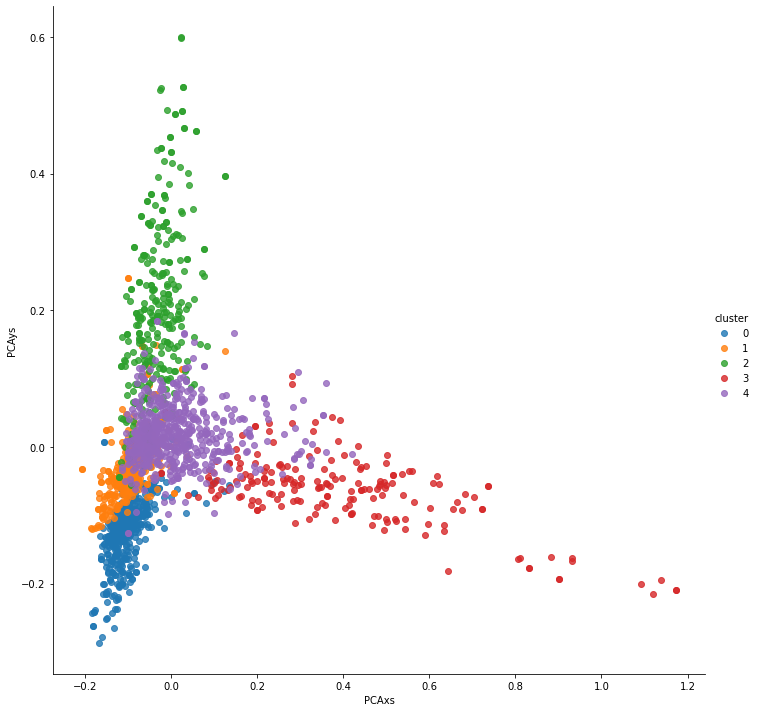

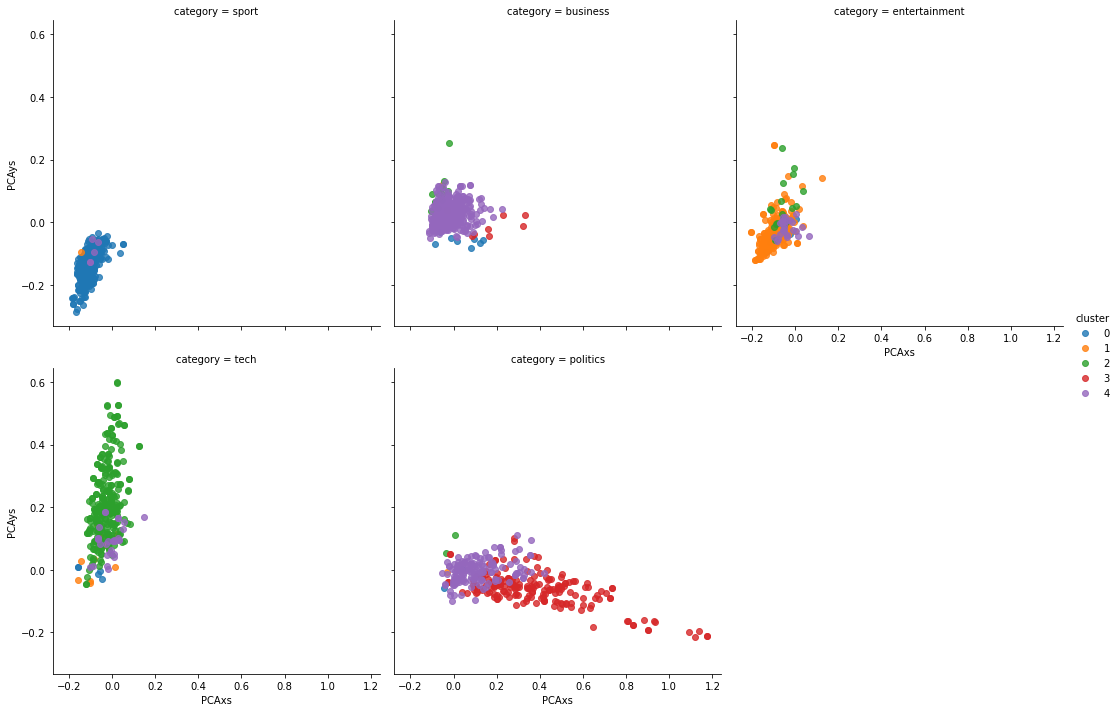

In [58]:
#PLOT

resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PCAxs'] = pos[:, 0]
resultFrame['PCAys'] = pos[:, 1]
resultFrame=pd.DataFrame(resultFrame)

sns.lmplot('PCAxs','PCAys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PCAxs','PCAys',hue='cluster',col='category',data=resultFrame,fit_reg=False,height=5, col_wrap=3)

#### 4) SVD plot

In [59]:
#### 3) PCA plot#SVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
psvd = svd.fit_transform(dist)

PSVDxs, PSVDys = psvd[:, 0], psvd[:, 1]

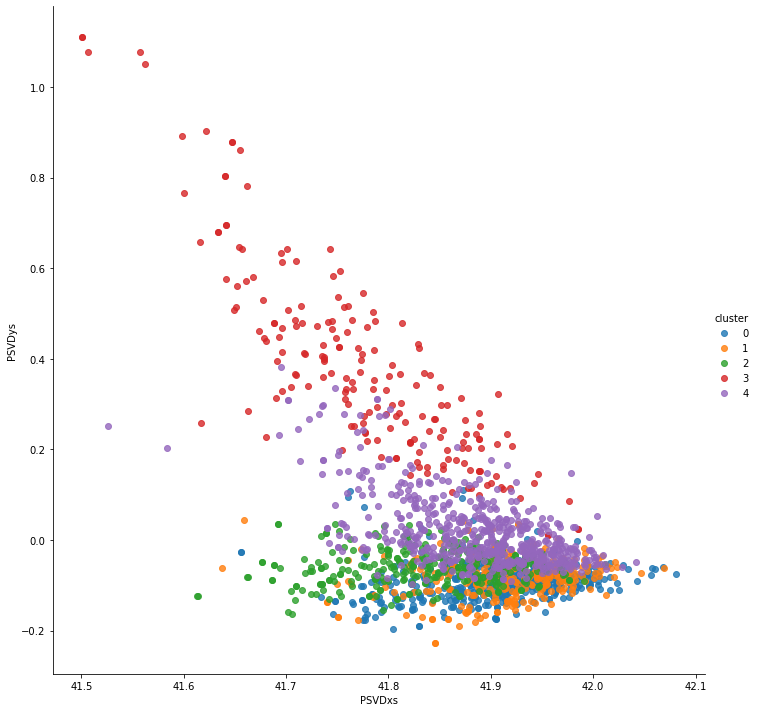

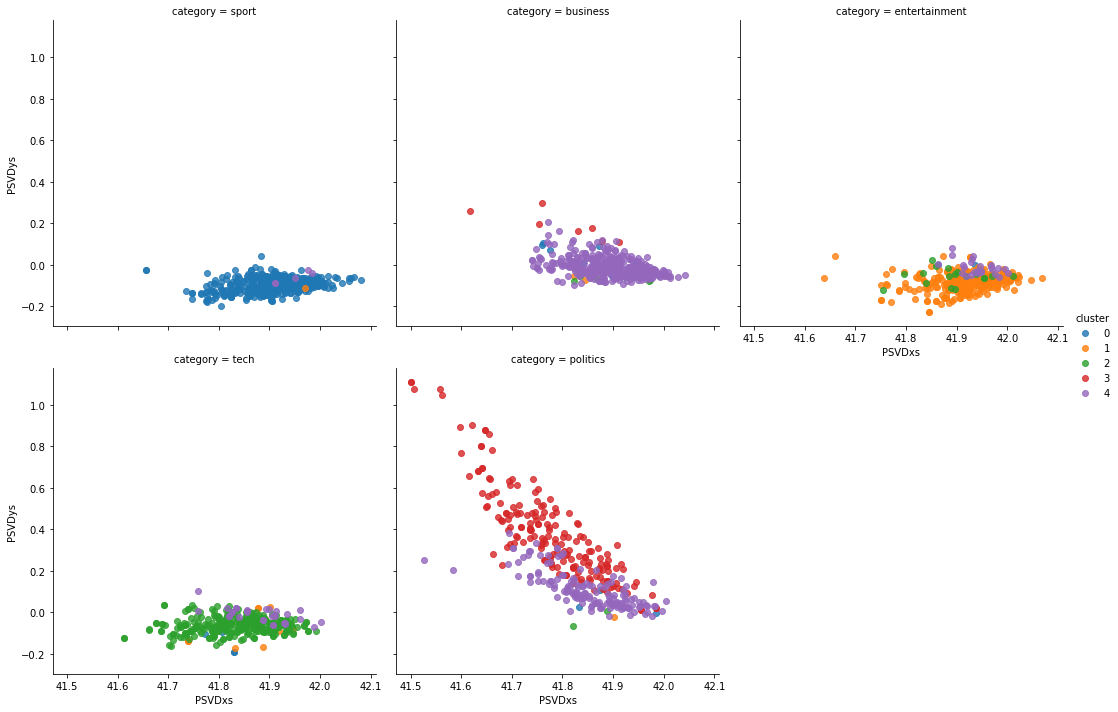

In [60]:
#PLOT

resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PSVDxs'] = psvd[:, 0]
resultFrame['PSVDys'] = psvd[:, 1]
resultFrame=pd.DataFrame(resultFrame)
resultFrame=resultFrame.reset_index()

sns.lmplot('PSVDxs','PSVDys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PSVDxs','PSVDys',hue='cluster',col='category',data=resultFrame,fit_reg=False, height=5, col_wrap=3)

#### 5) ICA plot

In [61]:
ica = FastICA(n_components=2, random_state=42)
pica = ica.fit_transform(dist)

PICAxs, PICAys = pica[:, 0], pica[:, 1]

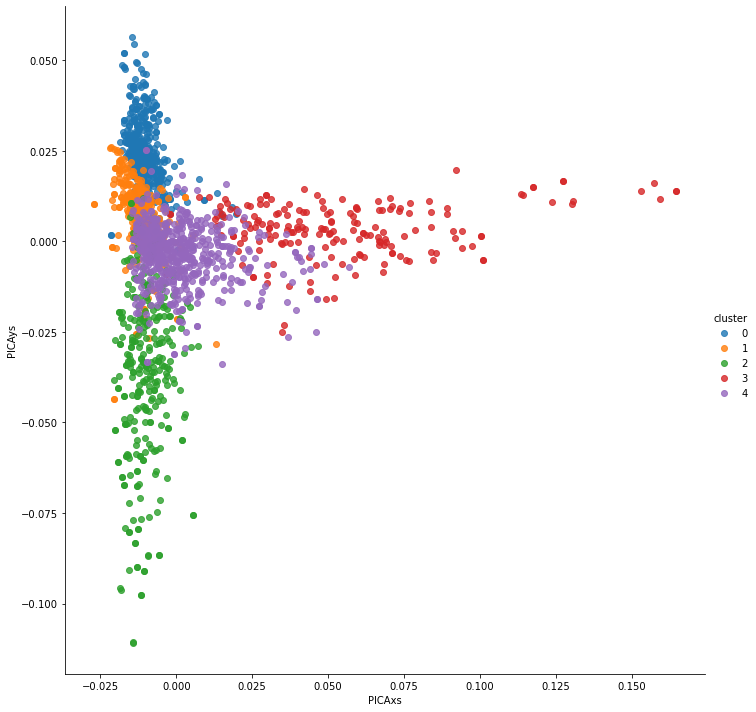

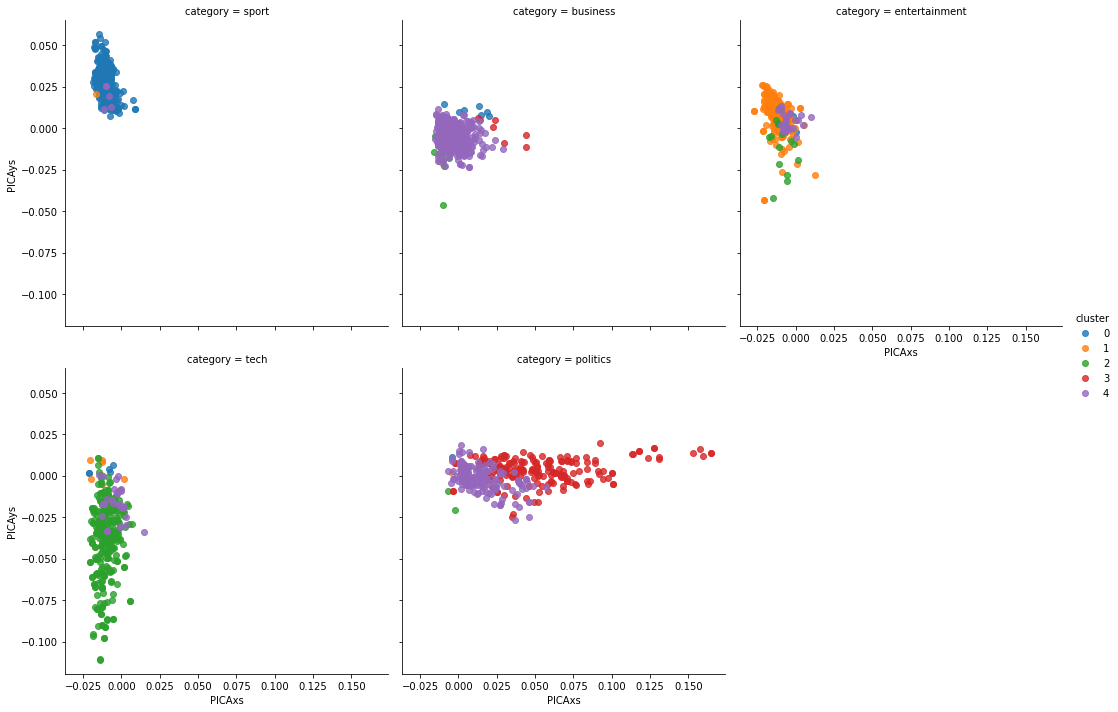

In [62]:
resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PICAxs'] = pica[:, 0]
resultFrame['PICAys'] = pica[:, 1]
resultFrame=pd.DataFrame(resultFrame)

sns.lmplot('PICAxs','PICAys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PICAxs','PICAys',hue='cluster',col='category',data=resultFrame,fit_reg=False,height=5, col_wrap=3)

# Clustering Word2Vec

In [63]:
sentence = []

tokenizer = WordPunctTokenizer()

for i in X_train.index:
    for word in X_train['content'][X_train.index==i]:
        sentence.append(tokenizer.tokenize(word.lower()))

In [64]:
from gensim.models import Word2Vec,word2vec

m = word2vec.Word2Vec(sentence,size=400, min_count=2,sg=1)

def vectorizer(sent,m):
    vec=[]
    numw=0
    for w in sent:
        try:
            if numw==0:
                vec=m[w]
            else:
                vec=np.add(vec,m[w])
            numw+=1
        except:
            pass
    return np.asarray(vec)/numw


In [65]:
l=[]
for i in lowercase:
    l.append(vectorizer(i,m))
X_wv=np.array(l)

c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


### Repeat the same method as the tf-idf clustering

In [66]:

cnum = 5
km = KMeans( n_clusters=cnum,random_state=0)
km=km.fit(X_wv)
clusters = km.labels_.tolist() 

In [67]:
dist = 1 - cosine_similarity(X_wv) 

In [68]:
#PCA

pca = PCA(n_components=2)
pos = pca.fit_transform(dist)

PCAxs, PCAys = pos[:, 0], pos[:, 1]

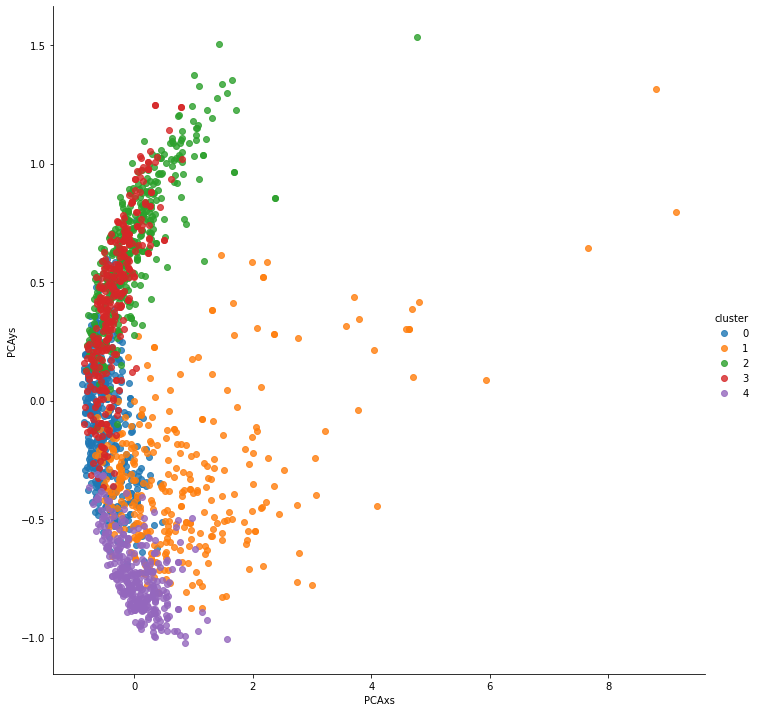

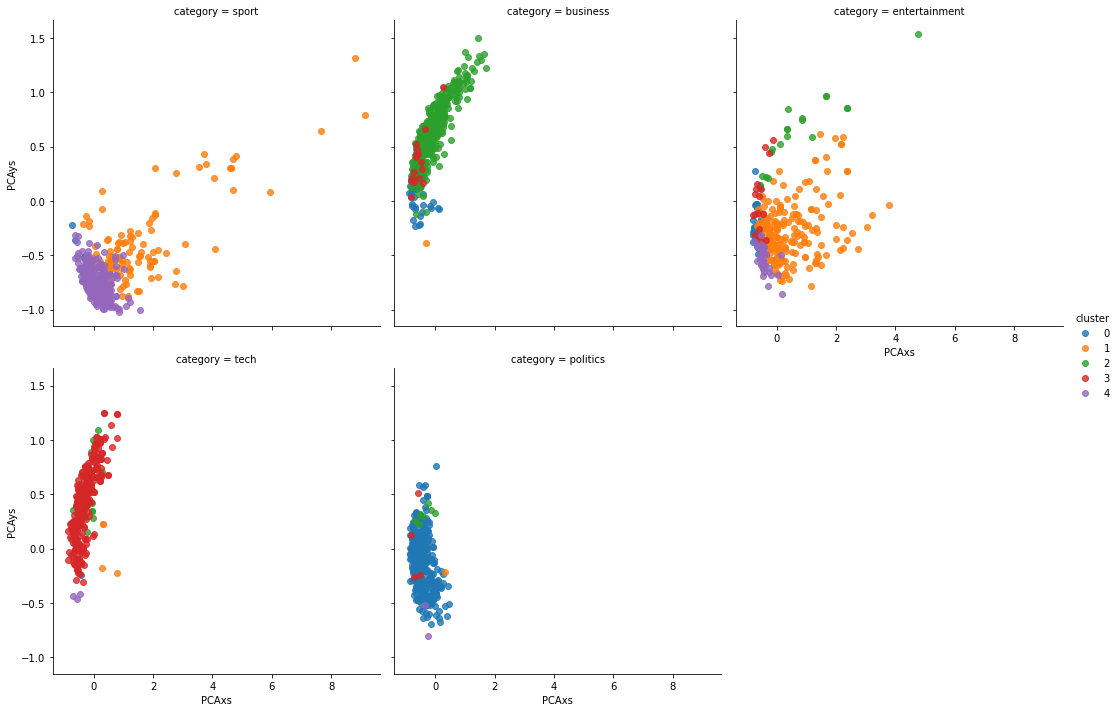

In [69]:
#PLOT

resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PCAxs'] = pos[:, 0]
resultFrame['PCAys'] = pos[:, 1]
resultFrame=pd.DataFrame(resultFrame)

sns.lmplot('PCAxs','PCAys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PCAxs','PCAys',hue='cluster',col='category',data=resultFrame,fit_reg=False,height=5, col_wrap=3)

In [70]:
#SVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
psvd = svd.fit_transform(dist)

PSVDxs, PSVDys = psvd[:, 0], psvd[:, 1]

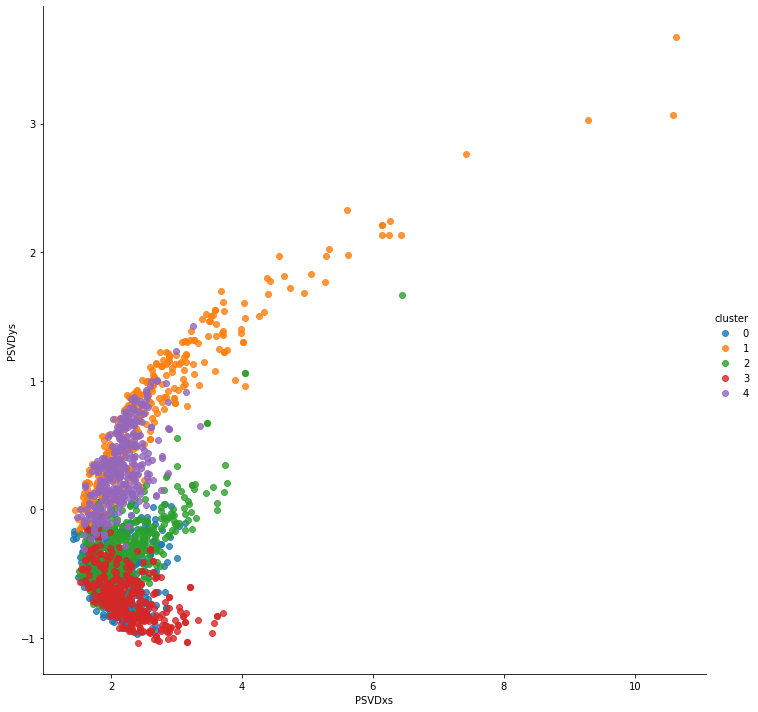

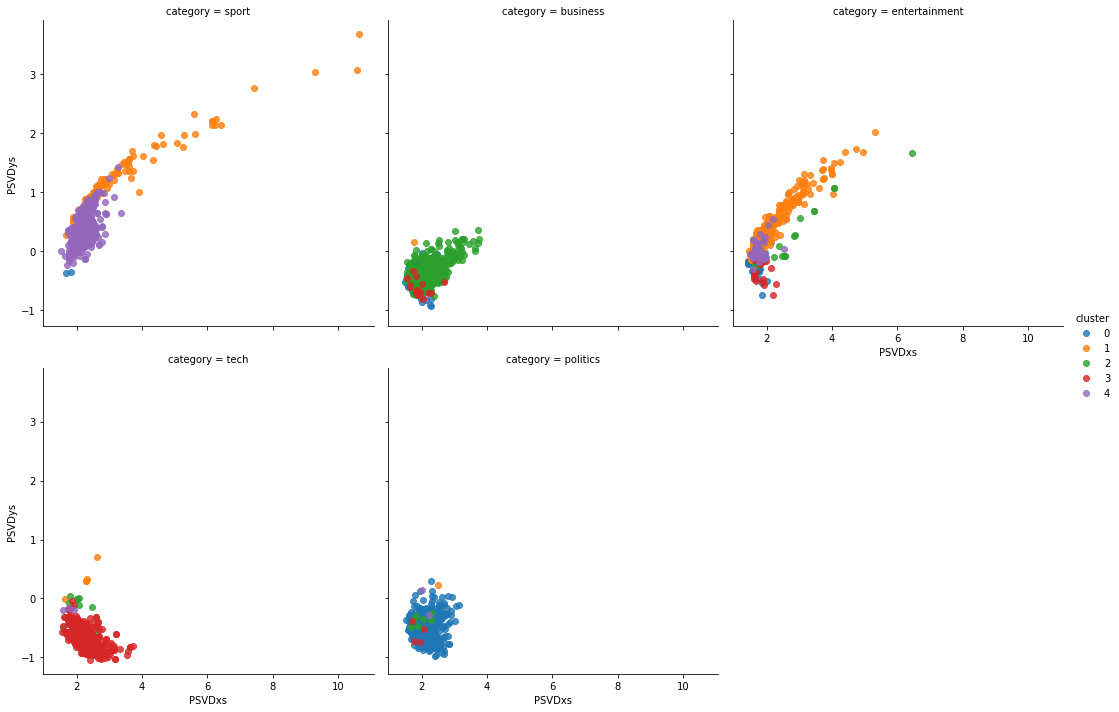

In [71]:
#PLOT

resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PSVDxs'] = psvd[:, 0]
resultFrame['PSVDys'] = psvd[:, 1]
resultFrame=pd.DataFrame(resultFrame)
resultFrame=resultFrame.reset_index()

sns.lmplot('PSVDxs','PSVDys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PSVDxs','PSVDys',hue='cluster',col='category',data=resultFrame,fit_reg=False, height=5, col_wrap=3)

In [72]:
#ICA

ica = FastICA(n_components=2, random_state=42)
pica = ica.fit_transform(dist)

PICAxs, PICAys = pica[:, 0], pica[:, 1]

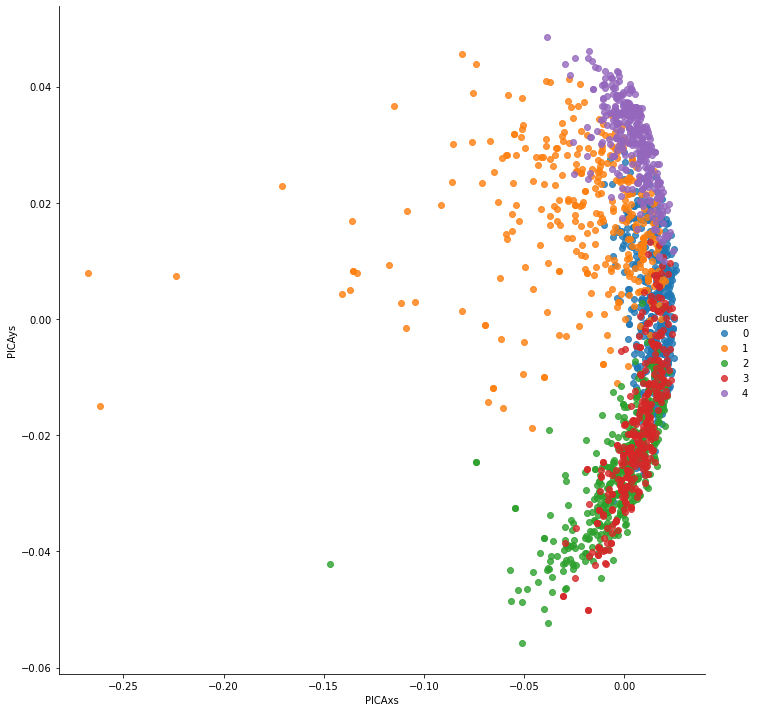

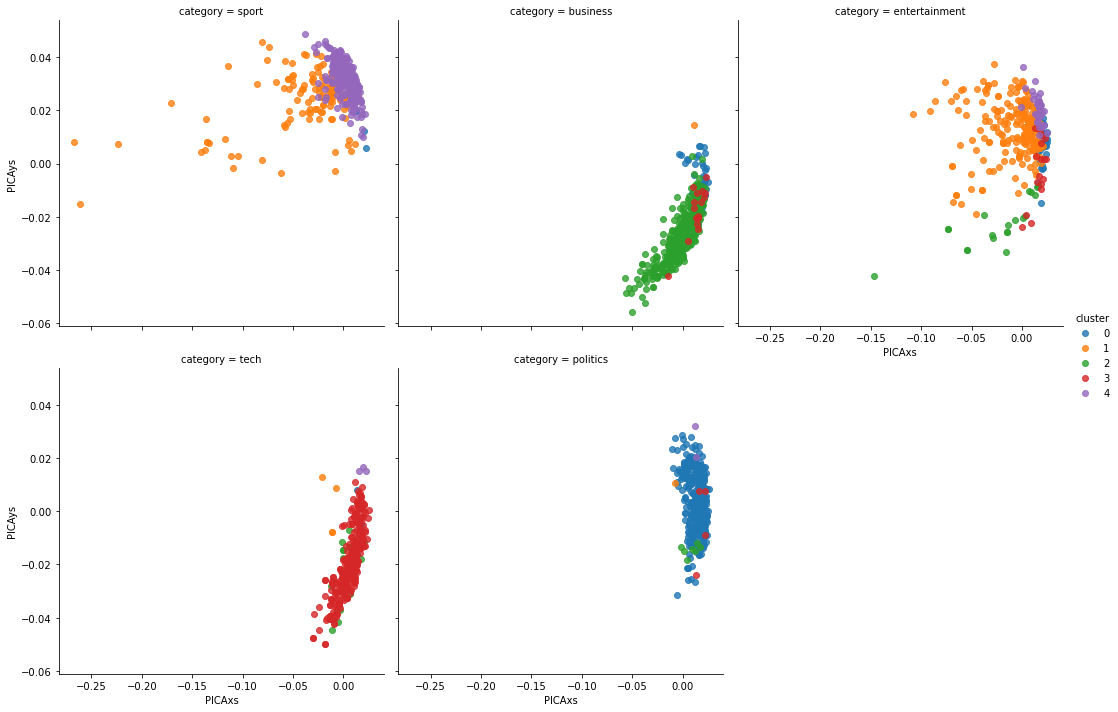

In [73]:
resultFrame = X_train.copy()
resultFrame['cluster']=clusters
resultFrame['PICAxs'] = pica[:, 0]
resultFrame['PICAys'] = pica[:, 1]
resultFrame=pd.DataFrame(resultFrame)

sns.lmplot('PICAxs','PICAys',hue='cluster',data=resultFrame,fit_reg=False, height=10)
sns.lmplot('PICAxs','PICAys',hue='cluster',col='category',data=resultFrame,fit_reg=False,height=5, col_wrap=3)